<a href="https://colab.research.google.com/github/anarebli/IA-DevIA/blob/main/atividade_regressao_ana_rebli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando o conjunto de dados de diabetes e a biblioteca numpy
from sklearn.datasets import load_diabetes
import numpy as np

db_diabete = load_diabetes()
db_diabete.keys() #retorna as chaves do dataset

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [2]:
print(db_diabete.DESCR) #imprime a descrição do dataset

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
print(db_diabete.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [4]:
X, y = db_diabete.data, db_diabete.target
X.shape, y.shape # X =  informa a quantidade de amostras e quantas caracteristicas existem / y = resultados

((442, 10), (442,))

0


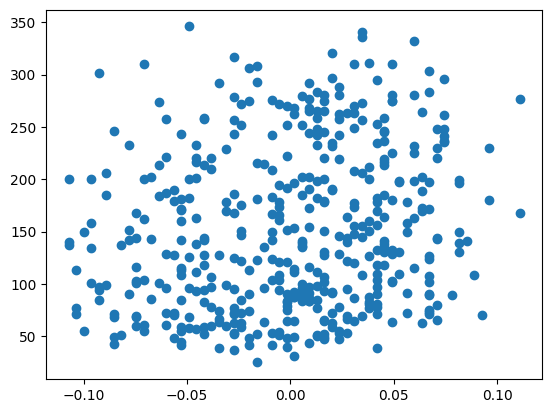

1


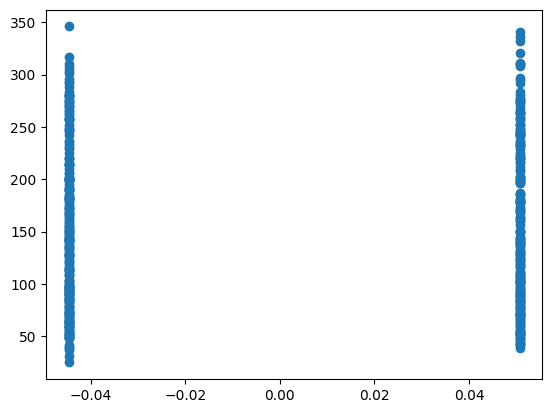

2


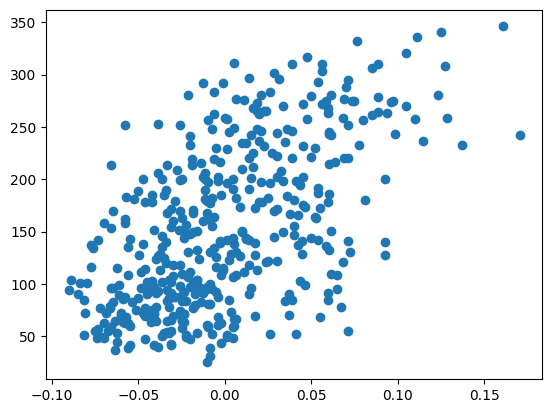

3


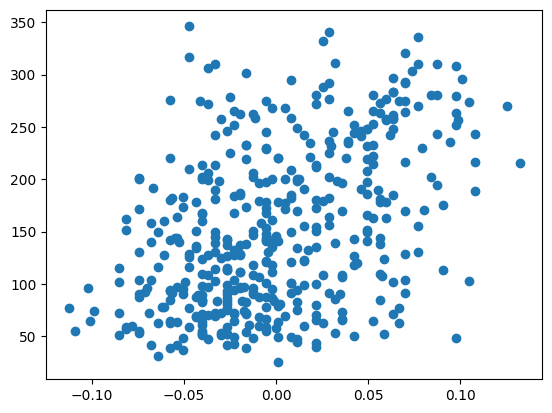

4


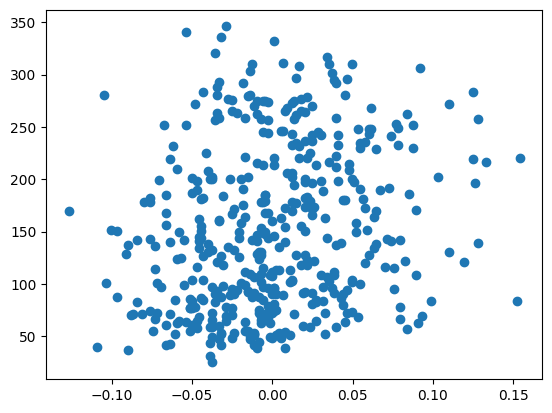

5


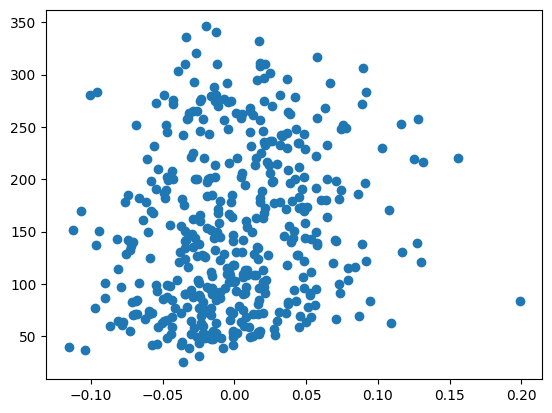

6


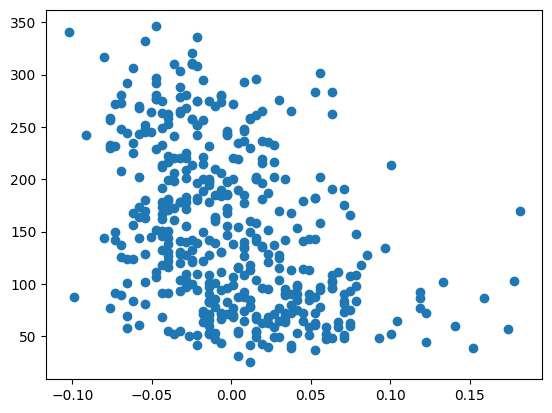

7


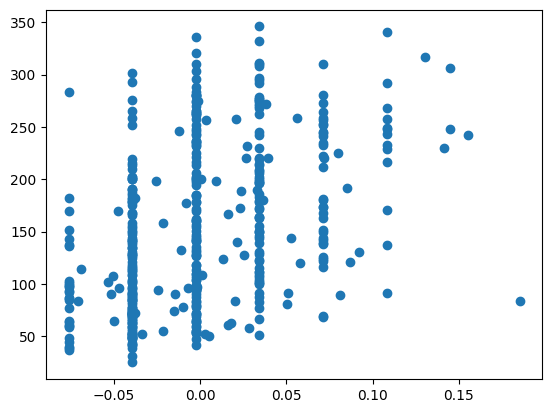

8


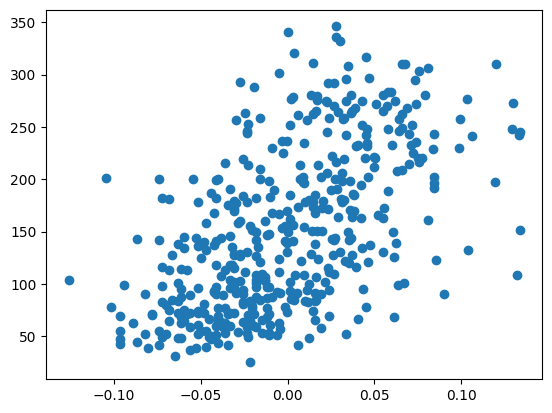

9


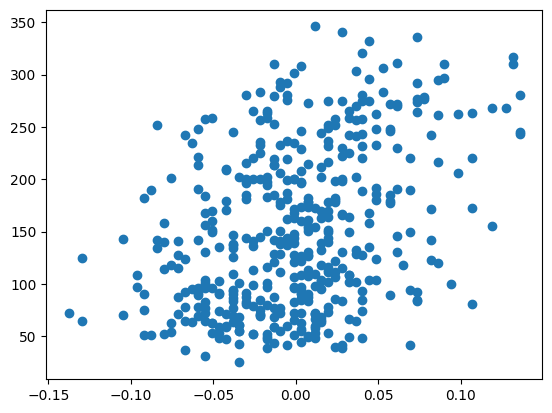

In [5]:
import matplotlib.pylab as plt
for i in range(X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()

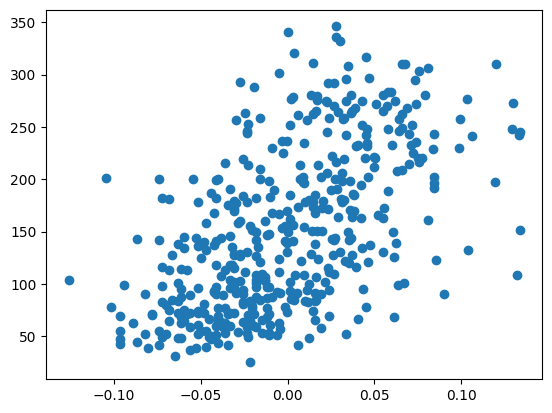

In [6]:
X8vetor = X[:,8]

X8=[]
for elemento in X8vetor:
    X8.append([elemento])

X8 = np.array(X8)

plt.scatter(X8, y)
plt.show()

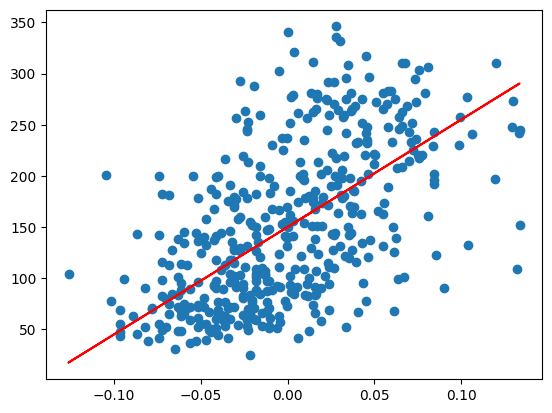

In [7]:
def modelo_linear(X, a, b):
    y= a*X + b
    return y
ypred = modelo_linear(X8, 1050, 150 )
plt.scatter(X8, y)
plt.plot(X8, ypred, 'r')
plt.show()

In [8]:
def mae(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yAbs =  abs(yDiff)
    errorSum =  sum(yAbs)
    mae = errorSum/len(yAbs)
    return mae

ypred = modelo_linear(X8,1050,150)

mae(y, ypred)

array([51.07621655])

In [9]:
def mse(y, ypred):
      yDiff = ypred - y.reshape(-1,1)
      yDiffSquare = yDiff**2
      somaErro = sum(yDiffSquare)
      mse = somaErro/len(yDiffSquare)
      return mse
ypred = modelo_linear(X8, 1050, 150 )
mse(y, ypred)

array([4076.09165937])

In [10]:
from math import sqrt
def rmse(y, ypred):
      yDiff = ypred - y.reshape(-1,1)
      yDiffSquare = yDiff**2
      somaErro = sum(yDiffSquare)
      mse = somaErro/len(yDiffSquare)
      return sqrt(mse)
ypred = modelo_linear(X8, 1050,150)
mse(y, ypred)

array([4076.09165937])

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y, ypred):
    mse = mean_squared_error(y, ypred)
    return sqrt(mse)
ypred = modelo_linear(X8, 1050,150)
rmse(y,ypred)

63.84427663756155

4030.9987225912864
916.137374550914 152.13348416289585


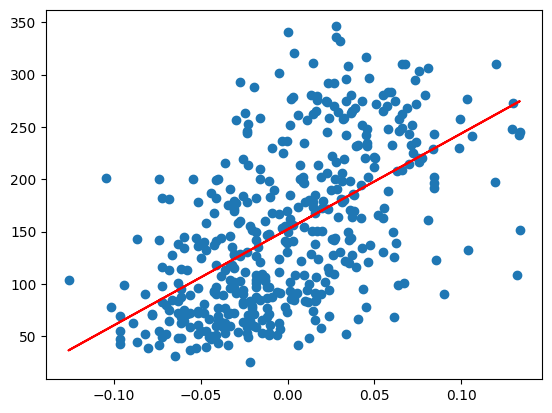

In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
        def __init__(self):
           self.a = 0
           self.b = 0
           self.w = np.zeros(2)

        def fit(self,X,y):
          amostra = len(X)
          Xmean = sum(X) / amostra
          Ymean = sum(y) / amostra
          numerador = 0
          denominador = 0
          for i in range(amostra):
              numerador += (X[i] - Xmean) * (y[i] - Ymean)
              denominador += (X[i] - Xmean)**2
          self.a = numerador[0]/denominador[0]
          self.b = Ymean - self.a * Xmean[0]

        def predict(self,X):
            y= self.a*X + self.b
            return y

modelo = regressao_linear()
modelo.fit(X8,y)
ypred = modelo.predict(X8)
print(mean_squared_error(y,ypred))
print(modelo.a, modelo.b)
plt.scatter(X8, y)
plt.plot(X8,ypred, 'r')
plt.show()


In [13]:
print(modelo.a, modelo.b)

916.137374550914 152.13348416289585


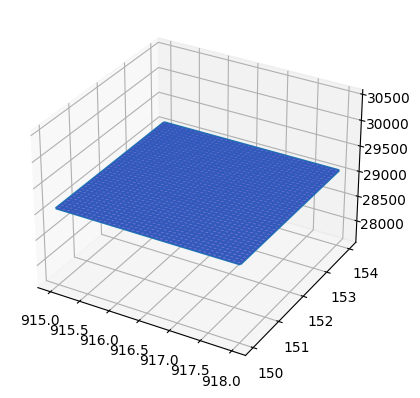

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np
w0 = np.linspace (915,918,40)
w1 = np.linspace(150,154,40 )

def z_function(W0, W1):
    modelo = regressao_linear()
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = W0[j][k]
            modelo.w[1] = W1[j][k]
            ypred = modelo.predict(X8)
            mse = mean_squared_error(y, ypred)
            Erro[j][k]= mse
    return Erro

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.75,
                cmap='coolwarm', edgecolor='none')


In [24]:
#realizando o ajuste de uma regressão linear simples aos dados.
import numpy as np

# Dados de exemplo
X = X8
Y = y
# Cria uma matriz de características 'X_b'
X_b = np.c_[np.ones((X.shape[0], 1)), X]

#Calcula os coeficientes da regressão linear usando a fórmula de mínimos quadrados, Calculando o produto escalar , a matriz inversa dessa multiplicação
coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
intercept = coefficients[0]
slope = coefficients[1]

coefficients

array([152.13348416, 916.13737455])

170.51240981363347


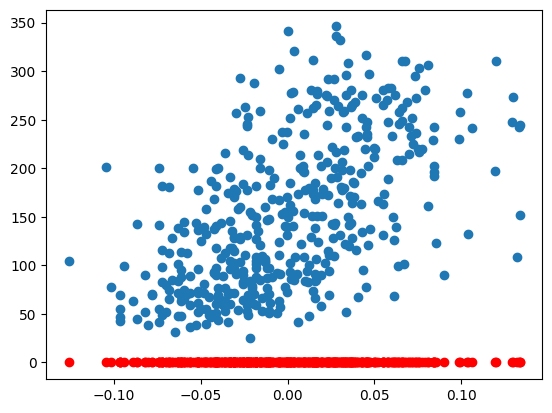

array([152.13348416, 916.13737455])

In [25]:
#criando uma nova classe para ajustar um modelo de regressão linear

from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
  def __init__(self):
    self.w = np.zeros((2,1))

  @staticmethod
  def addBias(X):
    bias = np.ones((X.shape[0],1))
    X_b = np.concatenate((bias, X), axis=1)
    return X_b

  def fit(self,X,y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    self.w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

  def predict(self,X):
    X_b = self.addBias(X)
    y= X_b.dot(self.w)
    return y


plt.scatter(X8,y)

modelo = regressao_linear()
ypred = modelo.predict(X8)
print(rmse(y,ypred))
plt.scatter(X8,ypred, color='r')
modelo.fit(X8,y)
plt.show()

modelo.w

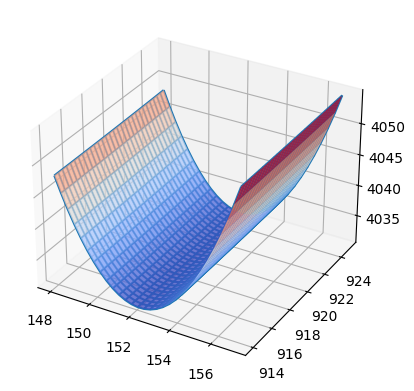

In [28]:
#teste novo
from sklearn.metrics import mean_squared_error
import numpy as np

w0 = np.linspace(148, 157, 30)
w1 = np.linspace(914,925, 30)

def z_function(W0, W1):
  modelo = regressao_linear()
  Erro = np.empty(W0.shape)
  for j in range(Erro.shape[0]):
    for k in range(Erro.shape[1]):
      modelo.w[0] = W0[j][k]
      modelo.w[1] = W1[j][k]
      ypred = modelo.predict(X8)
      mse = mean_squared_error(y, ypred)
      Erro[j][k] =mse
  return Erro

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

#plotar
ax.plot_wireframe(W0, W1, Erro)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.75, cmap='coolwarm', edgecolor='none')

plt.show()

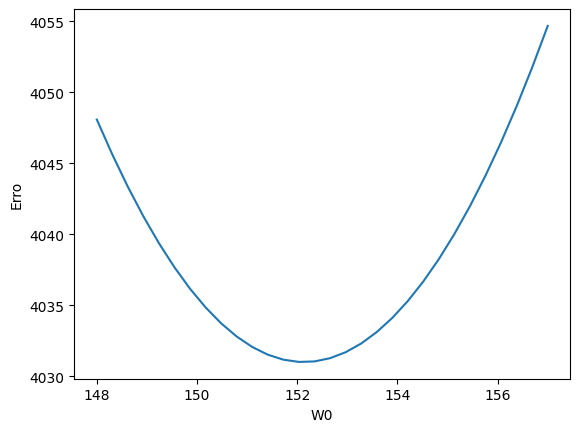

In [29]:
plt.ylabel("Erro")
plt.xlabel("W0")
i=8
plt.plot(W0[i,:],Erro[i,:])
plt.show()

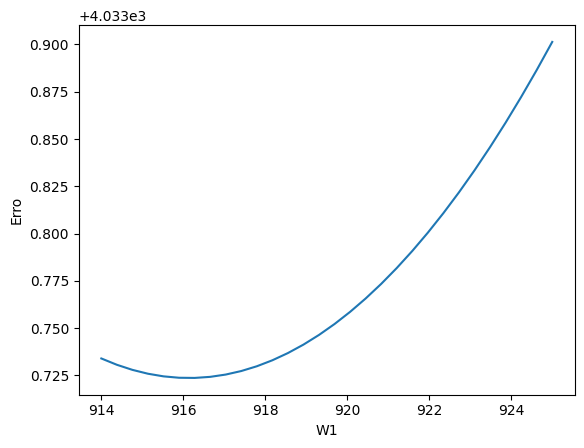

In [30]:
plt.ylabel("Erro")
plt.xlabel("W1")
i=8
plt.plot(W1[:,i],Erro[:,i])
plt.show()